In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("SupermarketPurchase.csv")

In [3]:
data.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cust_id                       702 non-null    int64  
 1   AVG_Actual_price_12           702 non-null    float64
 2   Purchase_Value                702 non-null    float64
 3   No_of_Items                   702 non-null    int64  
 4   Total_Discount                702 non-null    float64
 5   MONTH_SINCE_LAST_TRANSACTION  702 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


### 2) Visualization

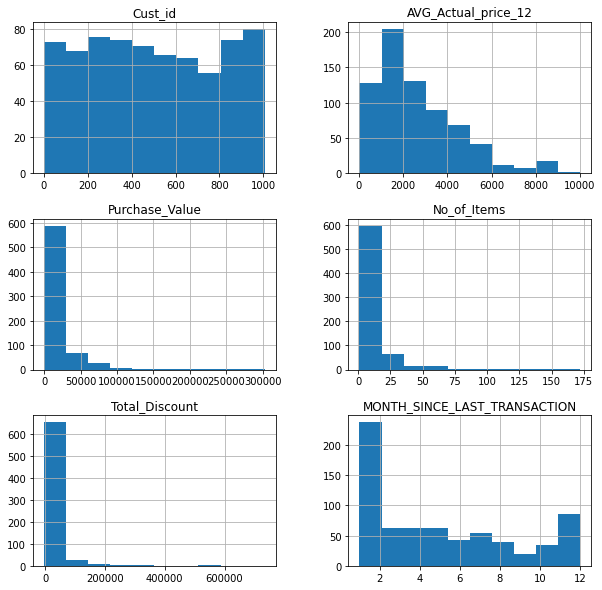

In [5]:
data.hist(figsize =(10,10))
plt.show()

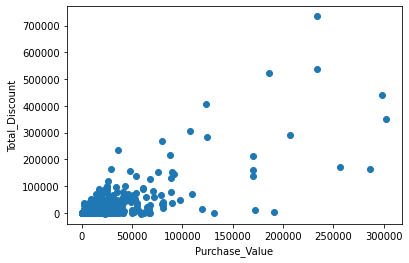

In [6]:
plt.scatter(data["Purchase_Value"], data["Total_Discount"])
plt.xlabel("Purchase_Value")
plt.ylabel("Total_Discount")
plt.show()

### 3)Clustering

#### 3.1. KMeans

In [7]:
data.drop(["Cust_id"], axis = 1 ,inplace = True)

In [8]:
data.head()

,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,300.000000,1200.00,4,0.00,11
1,2563.282500,41012.52,16,78737.48,2
2,3510.000000,7020.00,2,780.00,4
3,4530.000000,13590.00,3,1510.00,1
4,2428.076923,33455.00,15,17445.00,6


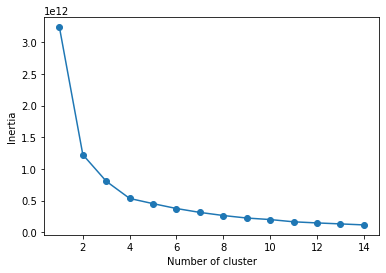

In [9]:
# find n value

from sklearn.cluster import KMeans

cwss = []

for i in range(1, 15):
    kmean = KMeans(n_clusters = i)
    kmean.fit(data)
    cwss.append(kmean.inertia_)

plt.plot(range(1, 15), cwss, "-o")
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

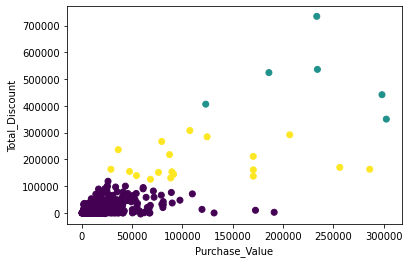

In [10]:
# KMean n = 3 için

kmean2 = KMeans(n_clusters = 3)
cluster = kmean2.fit_predict(data)
data["kmean_label"] = cluster

plt.scatter(data["Purchase_Value"], data["Total_Discount"], c = data["kmean_label"])
plt.xlabel("Purchase_Value")
plt.ylabel("Total_Discount")
plt.show()

#### 3.2. Hierarchy Clustering

##### Dendogram

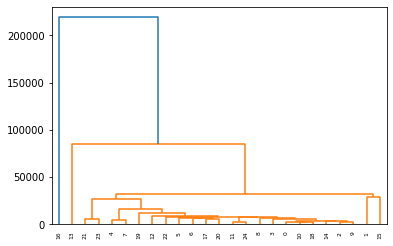

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data.iloc[0:25,:], method = "single")
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

In [ ]:
# HC

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
hc.fit_predict(data)

data["kmean_label"] = cluster

plt.scatter(data["Purchase_Value"], data["Total_Discount"], c = data["kmean_label"])
plt.xlabel("Purchase_Value")
plt.ylabel("Total_Discount")
plt.show()